In [40]:
import mindscope_utilities
import mindscope_utilities.ophys
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc
import visual_behavior.plotting as vbp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from visual_behavior.data_access import from_lims
import visual_behavior.database as db

from tqdm import tqdm
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [26]:
import mindscope_utilities.ophys as ophys

In [27]:
ophys.build_tidy_cell_df?

In [19]:
from importlib import reload
reload(scae)

<module 'visual_behavior.visualization.qc.single_cell_across_experiments' from '/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/visualization/qc/single_cell_across_experiments.py'>

In [17]:
%matplotlib notebook

In [17]:
%load_ext autoreload
%autoreload 2

In [11]:
from visual_behavior.visualization.qc import single_cell_across_experiments as scae

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
glm_version = '16_events_all_L2_optimize_by_session'

In [96]:
glm_results =  gat.retrieve_results({'glm_version': glm_version}, results_type='full')

In [95]:
glm_results_summary =  gat.retrieve_results({'glm_version': glm_version}, results_type='summary')

In [97]:
results_summary = glm_results_summary

In [20]:
saveloc = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/qc_plots/single_cell_plots/response_and_glm_summary'
cell_specimen_id = 1086517409 #glm_results['cell_specimen_id'].sample().iloc[0]
scae.make_single_cell_across_experiment_plot(cell_specimen_id, glm_version, disable_progress_bars=False, saveloc=saveloc, return_fig=False)

plot for csid 1086517409 already exists in /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/qc_plots/single_cell_plots/response_and_glm_summary


In [ ]:
with Pool(32) as pool:
    csids = glm_results['cell_specimen_id'].unique()
    args = zip(csids, [glm_version]*len(csids), [True]*len(csids), [saveloc]*len(csids), [False]*len(csids))
    pool.starmap(scae.make_single_cell_across_experiment_plot, args)

In [3]:
import glob
import os

In [7]:
def is_csid_in_folder(csid, folder):
    csids = []
    for fn in glob.glob(os.path.join(folder,'csid*.png')):
        csids.append(int(fn.split('csid=')[1].split('_')[0]))
    return csid in csids

In [12]:
csid = 1086586831
folder = ''
is_csid_in_folder(csid, folder)

False

In [106]:
cell_specimen_id = 1086577662

ophys_experiment_ids = scae.get_all_experiments_ids_for_cell(cell_specimen_id)
experiments = scae.get_experiments(ophys_experiment_ids)

loading experiments: 100%|██████████| 8/8 [00:00<00:00, 41.45it/s]


In [107]:
scae.append_event_triggered_averages_to_experiments(experiments, cell_specimen_id)

adding tidy neural data and event triggered averages to each experiment: 100%|██████████| 8/8 [09:09<00:00, 68.69s/it]


populating plot axes for each experiment: 100%|██████████| 6/6 [00:36<00:00,  6.11s/it]


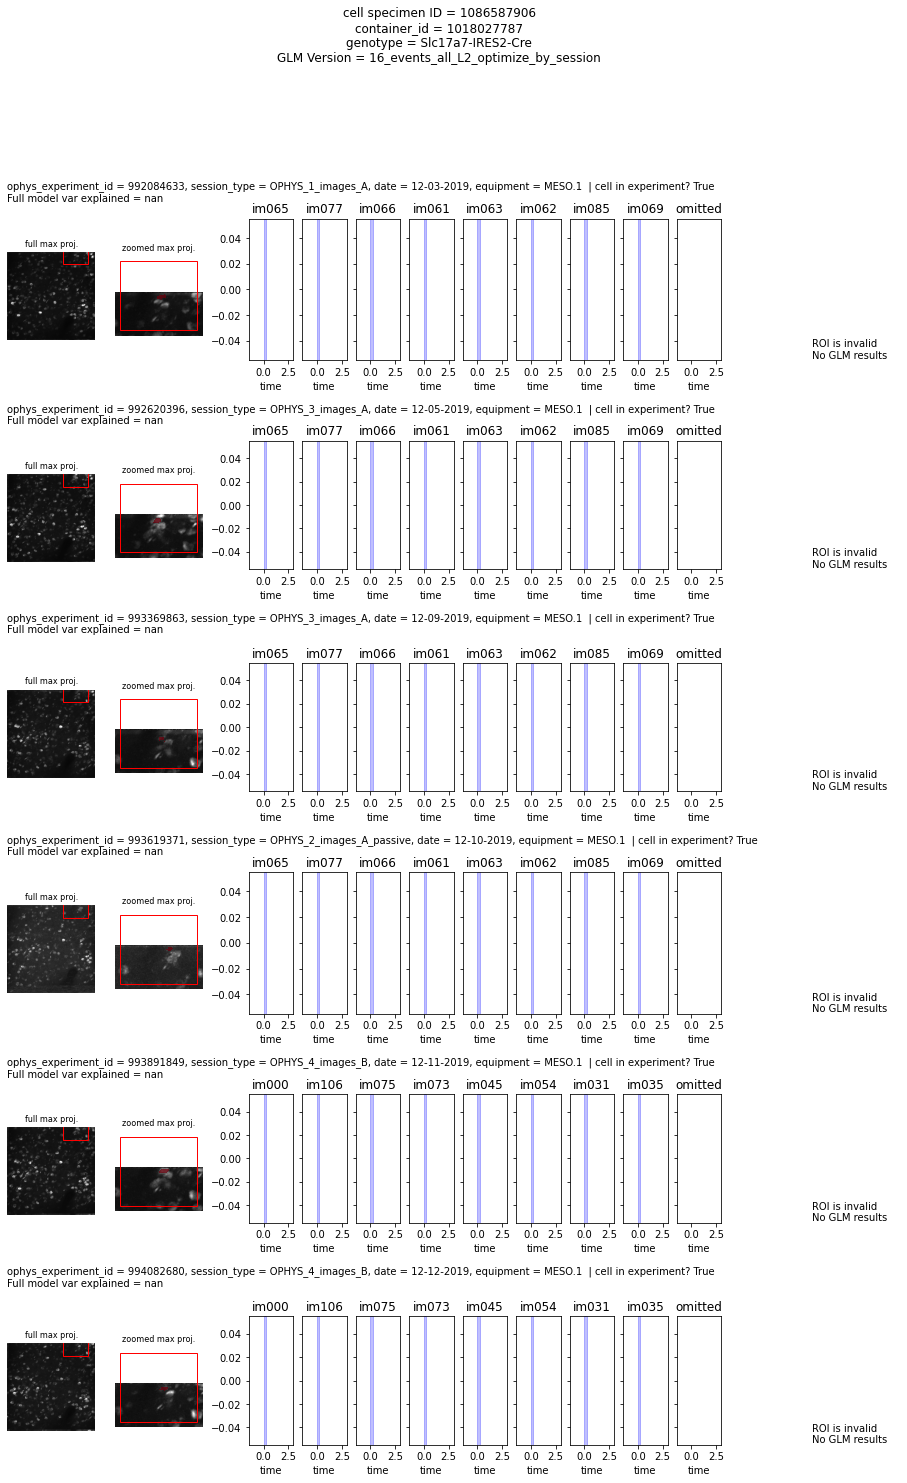

In [105]:
fig, ax = scae.assemble_plot(experiments, cell_specimen_id, glm_version)

In [101]:
%debug

> /home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/pandas/core/generic.py(1774)_get_label_or_level_values()
   1772             values = self.axes[axis].get_level_values(key)._values
   1773         else:
-> 1774             raise KeyError(key)
   1775 
   1776         # Check for duplicates

ipdb> u
> /home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/pandas/core/reshape/merge.py(988)_get_merge_keys()
    986                         right_keys.append(rk)
    987                     if lk is not None:
--> 988                         left_keys.append(left._get_label_or_level_values(lk))
    989                         join_names.append(lk)
    990                     else:

ipdb> u
> /home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/pandas/core/reshape/merge.py(626)__init__()
    624             self.right_join_keys,
    625             self.join_names,
--> 626         ) = self._get_merge_keys()
    627 
    628         # validate the merge keys dtypes. We may

In [104]:
search_dict = {'glm_version': '16_events_all_L2_optimize_by_session', 'cell_specimen_id': 1086587906}
gat.retrieve_results(search_dict)

""


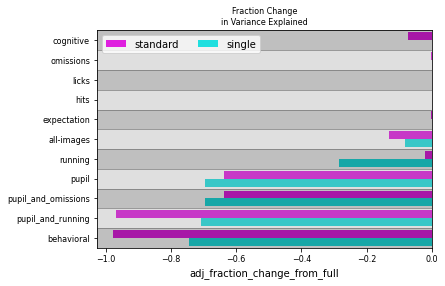

In [89]:
cell_specimen_id = 1086616570
ophys_experiment_id = 930996080

search_dict = {
    'cell_specimen_id': cell_specimen_id,
    'ophys_experiment_id': ophys_experiment_id,
    'glm_version': glm_version,
}
this_cell_results_summary = gat.retrieve_results(search_dict, results_type='summary')


dropouts_to_show = [
        'all-images',
        'omissions',
        'behavioral',
        'cognitive',
        'expectation',
        'licks',
        'pupil',
        'running',
        'pupil_and_omissions',
        'pupil_and_running',
        'hits'
    ]
dropouts_to_show += ['single-' + dropout for dropout in dropouts_to_show]



fig, ax = plt.subplots()

gvt.plot_dropout_summary(
    results_summary=this_cell_results_summary.query('dropout in @dropouts_to_show'),
    cell_specimen_id=cell_specimen_id,
    ax=ax,
    dropouts_to_show=None,
    dropouts_to_plot='both',
    dropouts_to_exclude=[],
    ylabel_fontsize=8,
    ticklabel_fontsize=8,
    title_fontsize=8,
    legend_fontsize=8
)

0

loading experiments: 100%|██████████| 7/7 [00:00<00:00, 41.85it/s]
adding tidy neural data and event triggered averages to each experiment: 100%|██████████| 7/7 [00:21<00:00,  3.09s/it]


<IPython.core.display.Javascript object>


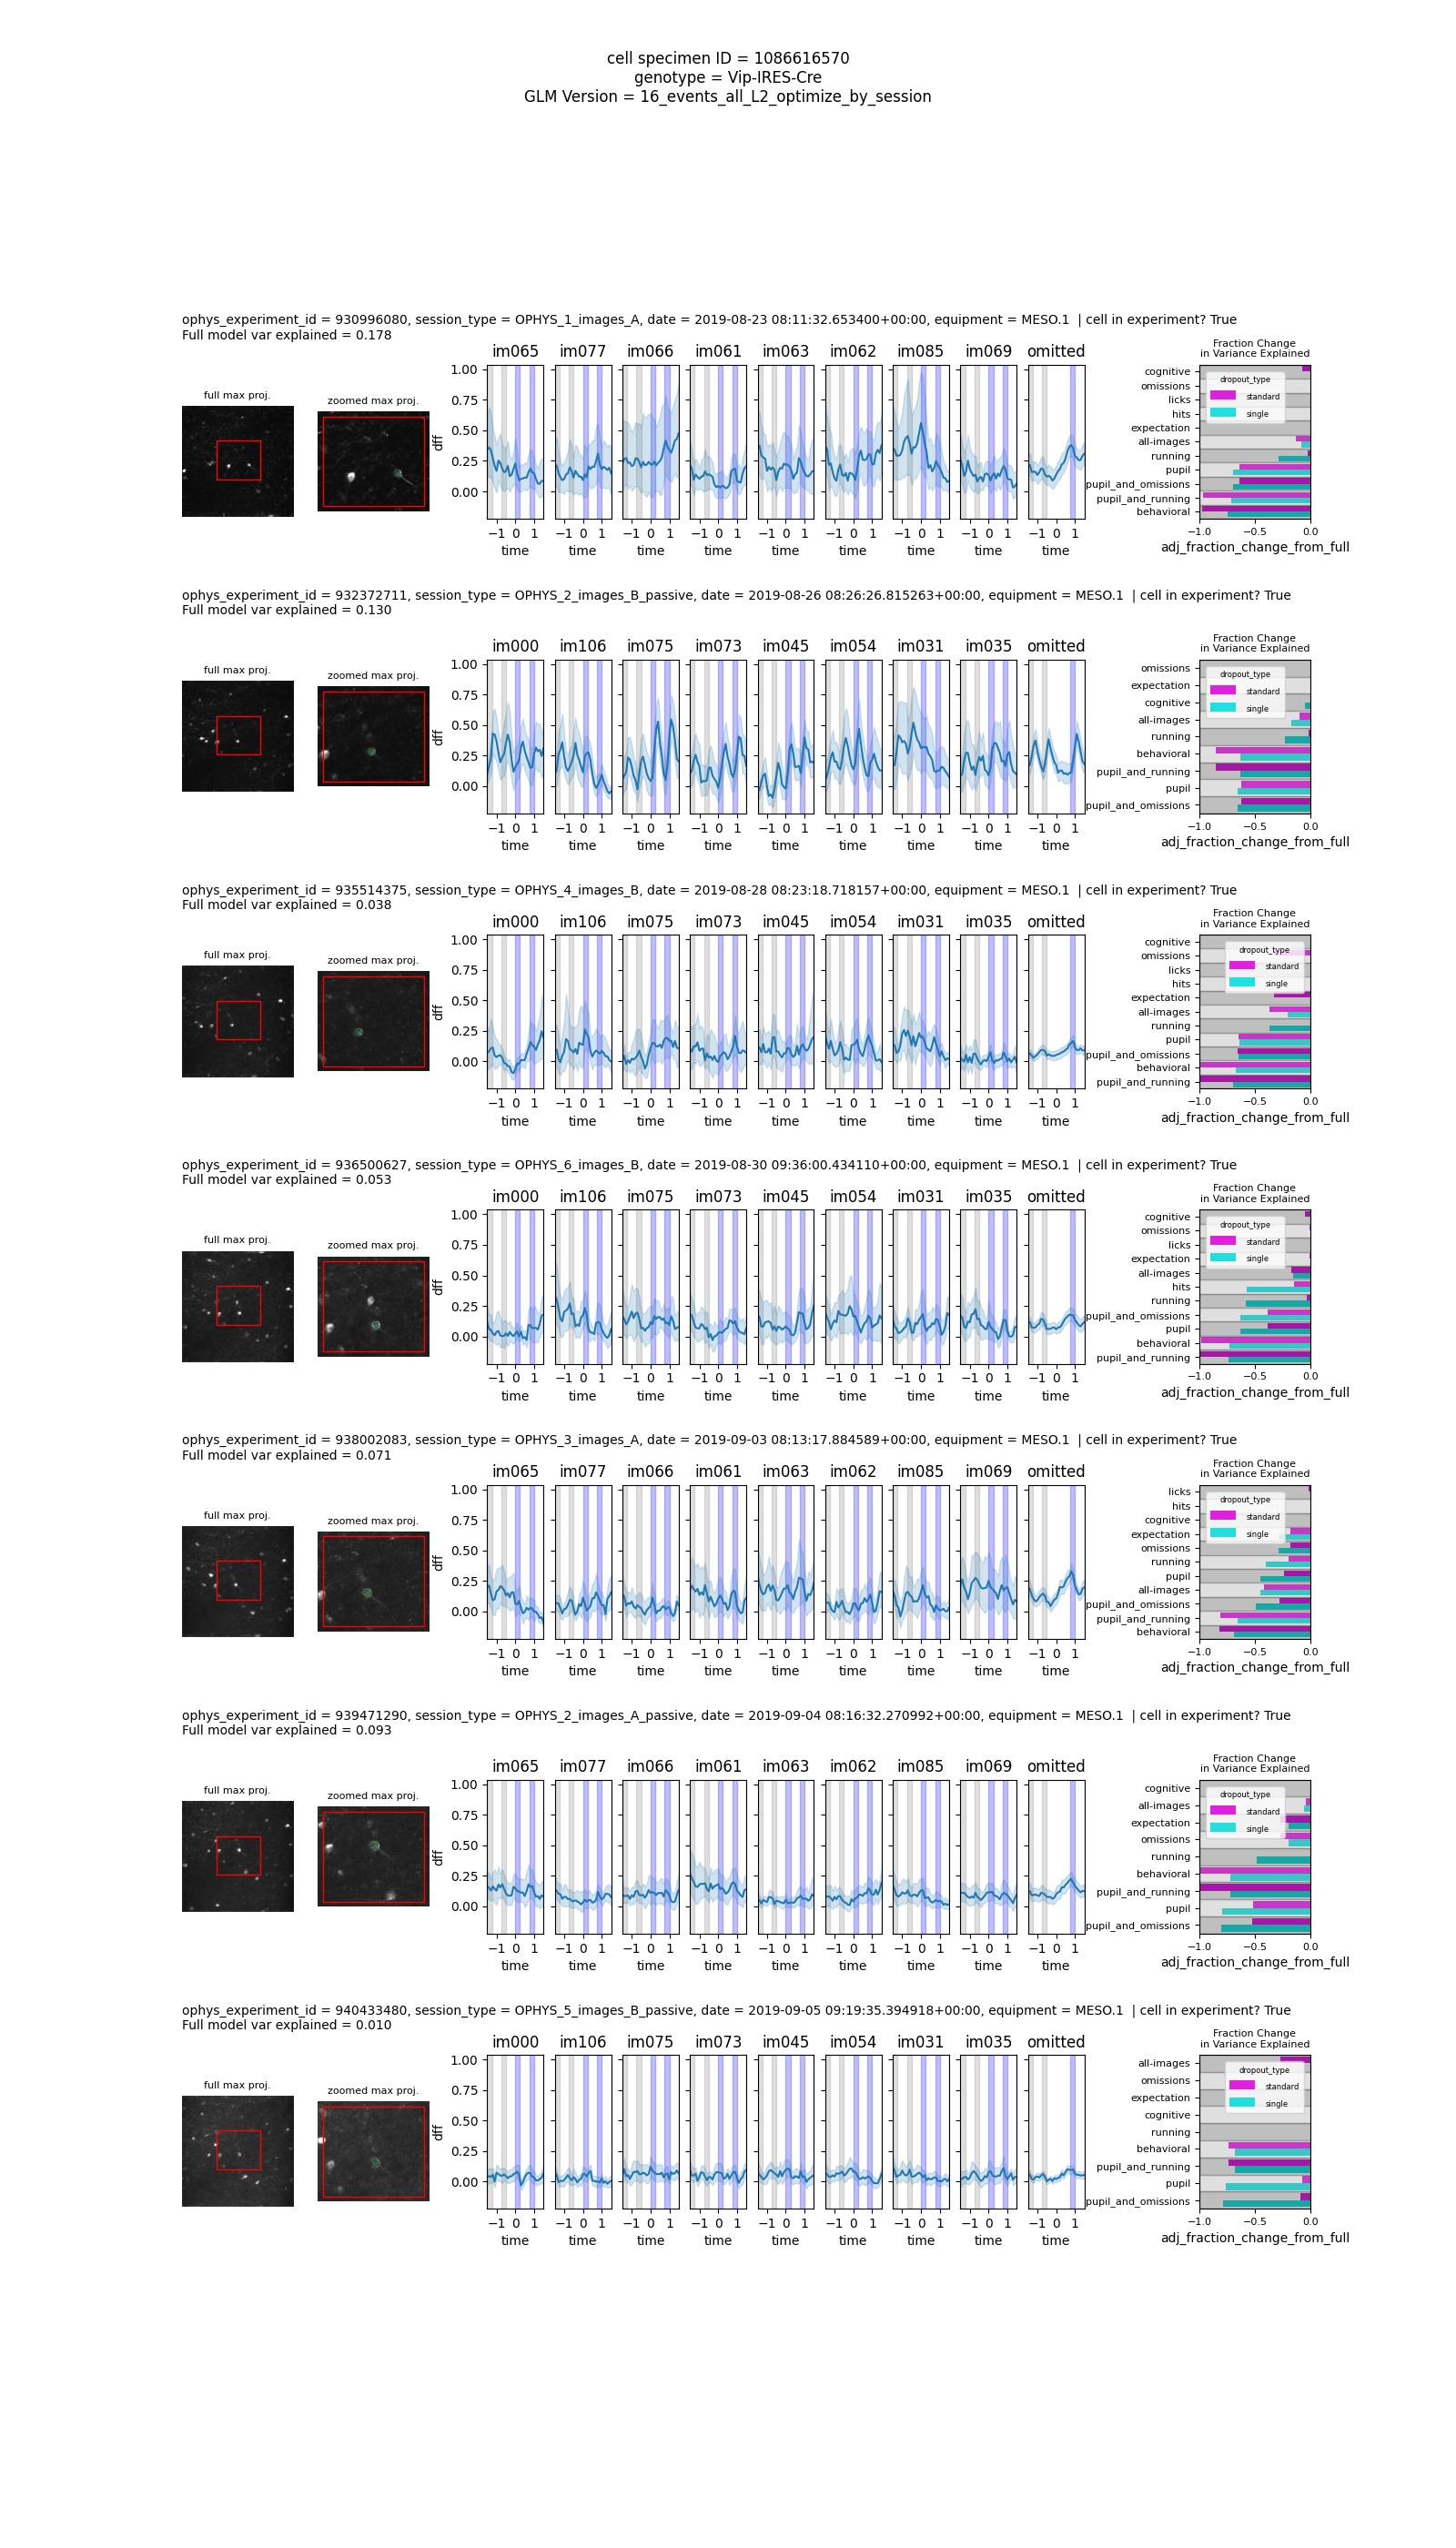

populating plot axes for each experiment: 100%|██████████| 7/7 [00:33<00:00,  4.73s/it]


In [138]:
fig, ax = scae.make_single_cell_across_experiment_plot(1086616570, glm_version, disable_progress_bars=False)

making plot for cell_specimen_id = 1086562169


loading experiments: 100%|██████████| 11/11 [00:00<00:00, 41.42it/s]
adding tidy neural data and event triggered averages to each experiment: 100%|██████████| 11/11 [04:15<00:00, 23.21s/it]
populating plot axes for each experiment:  18%|█▊        | 2/11 [00:13<00:59,  6.58s/it]


KeyError: 'ophys_experiment_id'

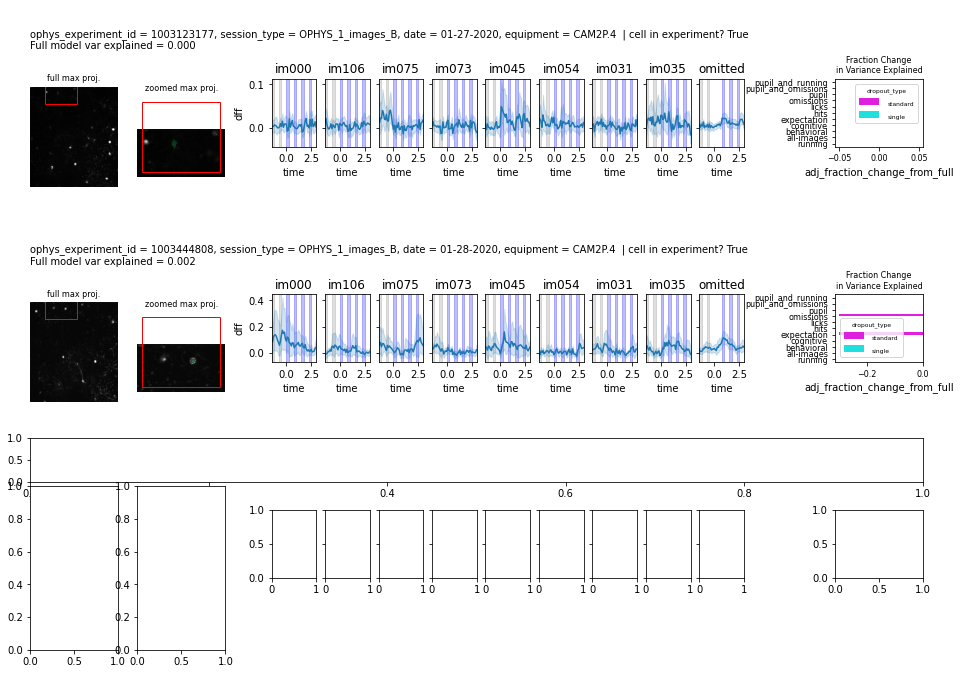

In [29]:
fig, ax = scae.make_single_cell_across_experiment_plot(1086562169, glm_version, disable_progress_bars=False)

In [153]:
fig.savefig('/home/dougo/test_figure.png')

In [151]:
experiment.metadata['date_of_acquisition'].strftime('%m-%d-%Y')

'06-06-2019'

In [125]:
%%time
ylim_extrema = [np.inf, -np.inf]
for ophys_experiment_id in ax.keys():
    for ii in range(9):
        ylims = ax[ophys_experiment_id]['visual_responses'][ii].get_ylim()
        ylim_extrema = [func((ylim_extrema[i], ylims[i])) for i,func in zip(range(2),[np.min, np.max])]

CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 2.47 ms


In [127]:
axes = ax
# apply ylims to all plots
for ophys_experiment_id in ax.keys():
    for ii in range(9):
        axes[ophys_experiment_id]['visual_responses'][ii].set_ylim(*ylim_extrema)

In [113]:
ylims

(-0.03137729029188347, 0.14020814519489866)

In [85]:
glm_results['cre_line'].unique()

array(['Vip-IRES-Cre', 'Sst-IRES-Cre', 'Slc17a7-IRES2-Cre'], dtype=object)

In [96]:
glm_results.query('Full__avg_cv_var_test > 0.15 and cre_line == "Vip-IRES-Cre"')

,cell_specimen_id,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,...,isi_experiment_id,imaging_depth,targeted_structure,published_at,date_of_acquisition,session_type,session_tags,failure_tags,model_outputs_available,location
31,1086614577,0.185085,0.158789,0.158789,0.185085,0.158789,0.158789,0.0,-0.0,-0.0,...,853117343,225,VISp,2021-03-25 00:00:00.000000,2019-09-18 10:41:11.695425,OPHYS_5_images_B_passive,NaN,parent_averaged_depth_image_1,False,Vip_VISp_225
580,1086612940,0.224460,0.183448,0.183448,0.224460,0.183448,0.183448,0.0,-0.0,-0.0,...,853117343,150,VISl,2021-03-25 00:00:00.000000,2019-09-16 11:47:43.190731,OPHYS_2_images_A_passive,NaN,NaN,False,Vip_VISl_150
1131,1086614094,0.218966,0.195155,0.195155,0.218966,0.195155,0.195155,0.0,-0.0,-0.0,...,853117343,225,VISp,2021-03-25 00:00:00.000000,2019-09-09 12:29:05.000000,OPHYS_1_images_A,NaN,NaN,True,Vip_VISp_225
1139,1086615860,0.214662,0.194088,0.194088,0.214662,0.194088,0.194088,0.0,-0.0,-0.0,...,853117343,225,VISp,2021-03-25 00:00:00.000000,2019-09-09 12:29:05.000000,OPHYS_1_images_A,NaN,NaN,True,Vip_VISp_225
1384,1086627527,0.246035,0.188879,0.188879,0.246035,0.188879,0.188879,0.0,-0.0,-0.0,...,815343876,150,VISp,2021-03-25 00:00:00.000000,2019-06-07 10:20:12.900288,OPHYS_4_images_B,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",True,Vip_VISp_150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57602,1086568868,0.447874,0.317617,0.317617,0.447874,0.317617,0.317617,0.0,-0.0,-0.0,...,852262774,223,VISl,2021-03-25 00:00:00.000000,2019-08-20 14:57:59.000000,OPHYS_5_images_B_passive,NaN,NaN,False,Vip_VISl_223
57614,1086568868,0.293947,0.172928,0.172928,0.293947,0.172928,0.172928,0.0,-0.0,-0.0,...,852262774,229,VISl,2021-03-25 00:00:00.000000,2019-08-05 13:38:55.000000,OPHYS_2_images_A_passive,NaN,NaN,False,Vip_VISl_229
57640,1086615597,0.296969,0.212058,0.212058,0.296969,0.212058,0.212058,0.0,-0.0,-0.0,...,815343876,312,VISl,2021-03-25 00:00:00.000000,2019-06-14 09:46:08.000000,OPHYS_4_images_B,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",True,Vip_VISl_312
58453,1086516497,0.225473,0.170319,0.170319,0.225473,0.170319,0.170319,0.0,-0.0,-0.0,...,885422294,175,VISp,2021-03-25 00:00:00.000000,2019-09-12 17:35:24.000000,OPHYS_3_images_A,NaN,"d_prime_peak,num_contingent_trials",True,Vip_VISp_175


loading experiments: 100%|██████████| 6/6 [00:00<00:00, 41.90it/s]
adding tidy neural data and event triggered averages to each experiment: 100%|██████████| 6/6 [05:33<00:00, 55.63s/it]


<IPython.core.display.Javascript object>


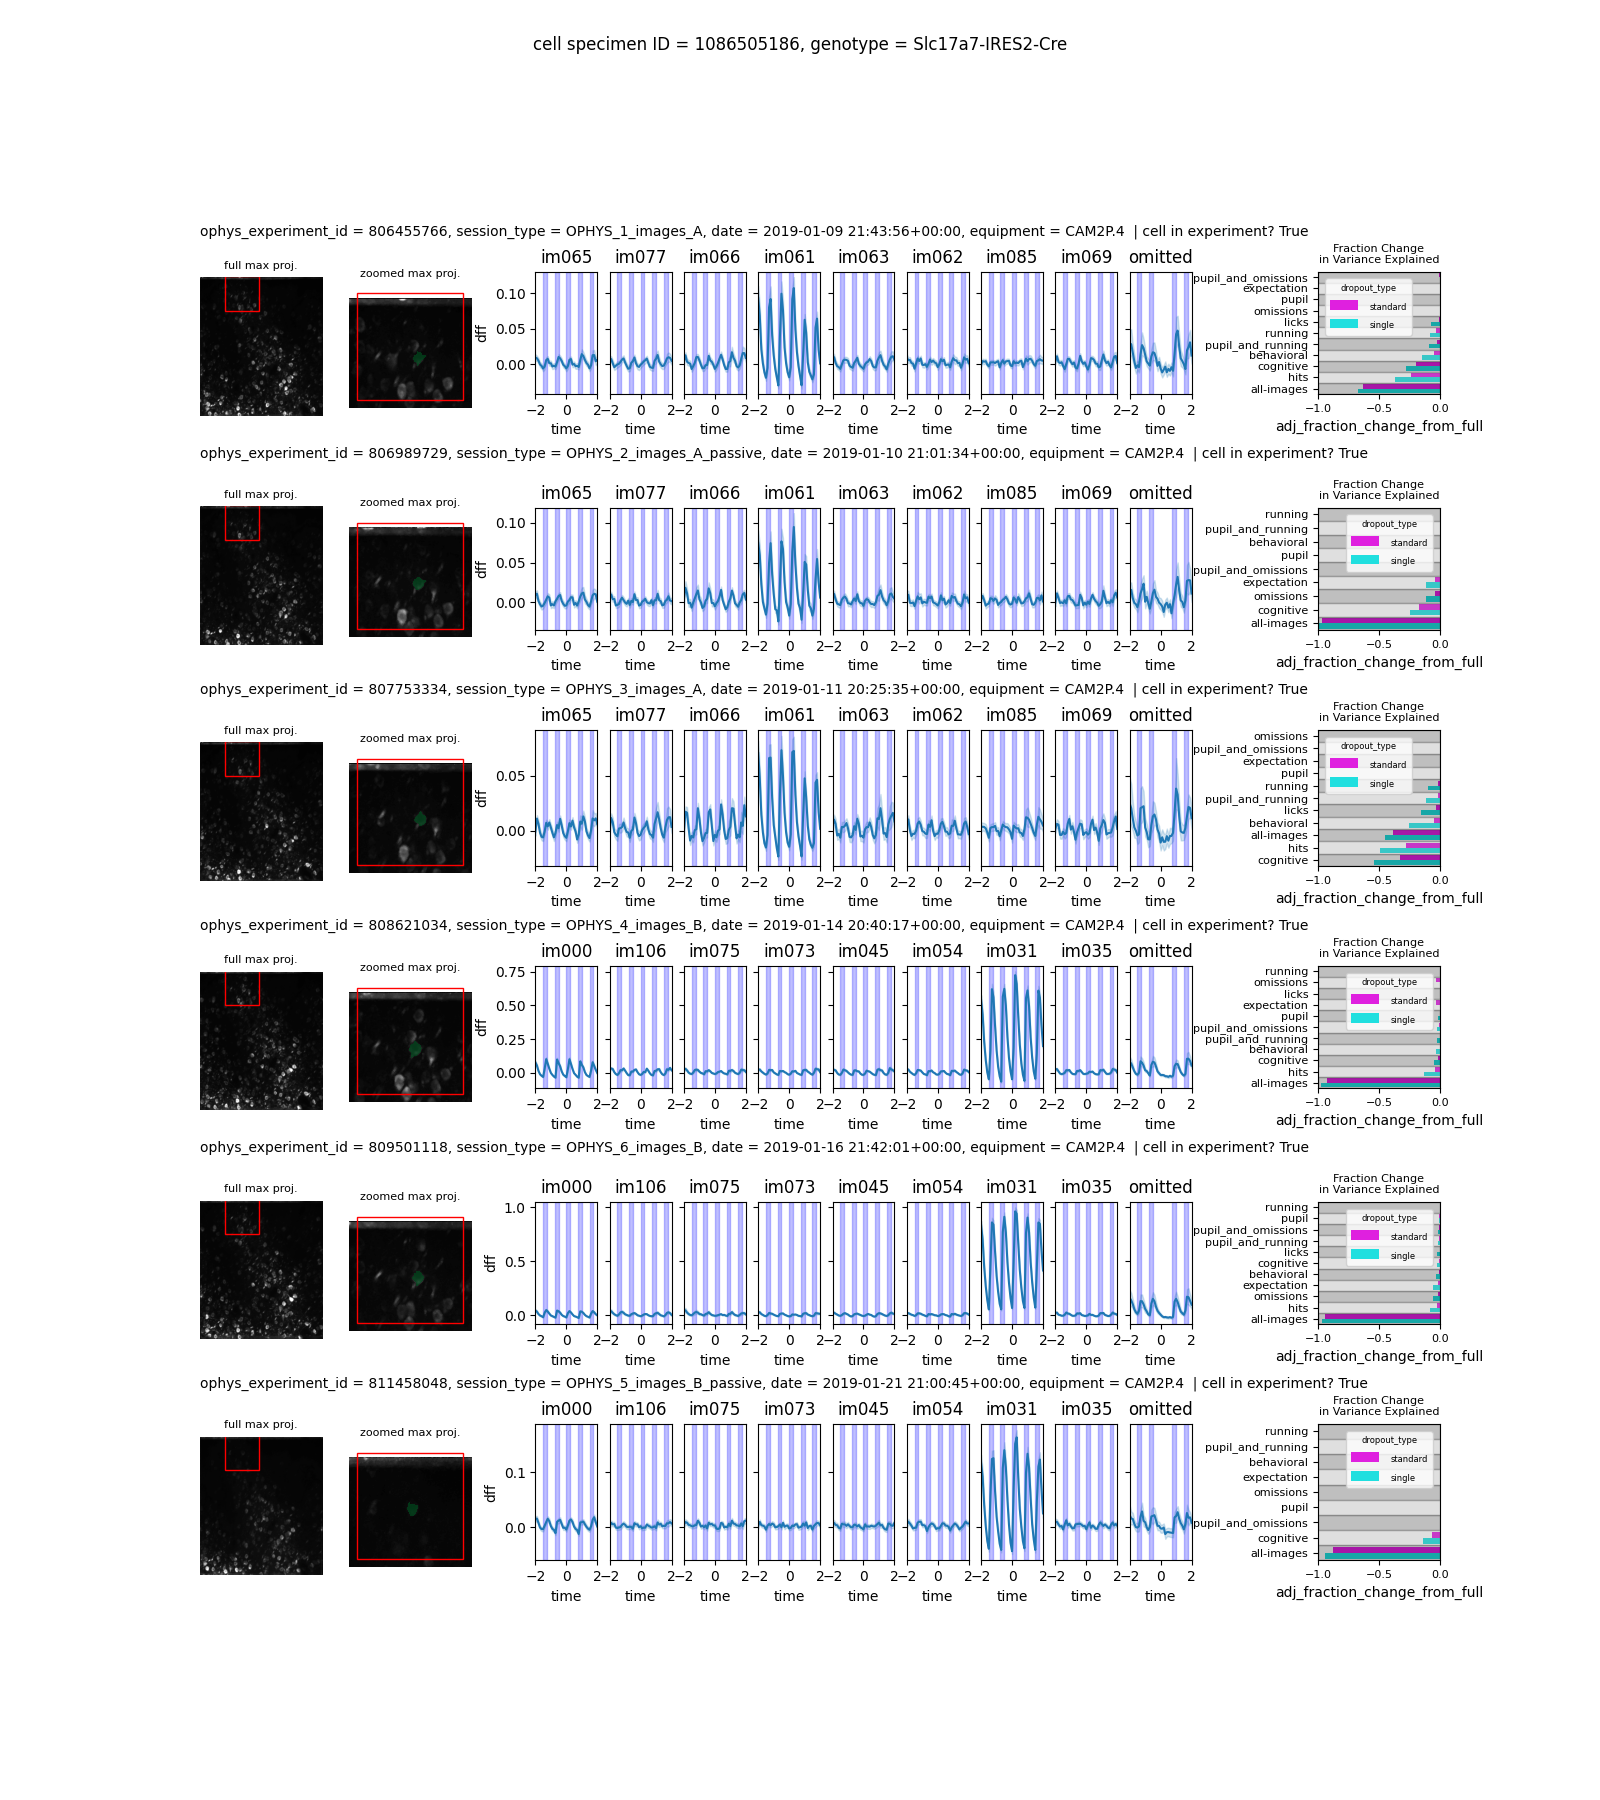

populating plot axes for each experiment: 100%|██████████| 6/6 [00:38<00:00,  6.34s/it]


In [54]:
make_single_cell_across_experiment_plot(1086505186)

In [24]:
make_single_cell_across_experiment_plot(1086514413)

loading experiments: 100%|██████████| 6/6 [00:00<00:00, 43.66it/s]
adding tidy neural data and event triggered averages to each experiment:  50%|█████     | 3/6 [00:33<00:33, 11.07s/it]


ValueError: array of sample points is empty

In [25]:
%debug

> /home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/numpy/lib/function_base.py(1412)interp()
   1410         fp = np.concatenate((fp[-1:], fp, fp[0:1]))
   1411 
-> 1412     return interp_func(x, xp, fp, left, right)
   1413 
   1414 

ipdb> u
> <__array_function__ internals>(5)interp()

ipdb> u
> /allen/programs/braintv/workgroups/nc-ophys/Doug/code/mindscope_utilities/mindscope_utilities/general_utilities.py(130)event_triggered_response()
    128         # on the linearly spaced time array
    129         data_dict.update({
--> 130             'event_{}_t={}'.format(event_number, event_time): np.interp(
    131                 data_dict['time'],
    132                 data_slice.index - event_time,

ipdb> data_slice
Series([], Name: dff, dtype: float64)
ipdb> event_number, event_time
(0, 308.65798)
ipdb> u
> /allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_analysis/visual_behavior/visualization/qc/single_cell_across_experiments.py(132)add_event_triggere

In [26]:
cache = bpc.VisualBehaviorOphysProjectCache.from_lims()
experiment_table = cache.get_ophys_experiment_table()

In [28]:
experiment_table.loc[993619369]

equipment_name                                                                MESO.1
donor_id                                                                   935565377
full_genotype                      Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...
mouse_id                                                                      485152
reporter_line                                                     Ai93(TITL-GCaMP6f)
driver_line                                          [Slc17a7-IRES2-Cre, Camk2a-tTA]
sex                                                                                M
age_in_days                                                                      152
foraging_id                                     5f2fab02-5edc-4141-a88f-faf45e8b8d96
cre_line                                                           Slc17a7-IRES2-Cre
indicator                                                                    GCaMP6f
session_number                                                   

In [46]:
cell_specimen_id = 1086514413

ophys_experiment_ids = scae.get_all_experiments_ids_for_cell(cell_specimen_id)
experiments = scae.get_experiments(ophys_experiment_ids)

loading experiments: 100%|██████████| 6/6 [00:00<00:00, 41.98it/s]


In [47]:
scae.append_event_triggered_averages_to_experiments(experiments, cell_specimen_id)

adding tidy neural data and event triggered averages to each experiment: 100%|██████████| 6/6 [00:33<00:00,  5.59s/it]


<IPython.core.display.Javascript object>


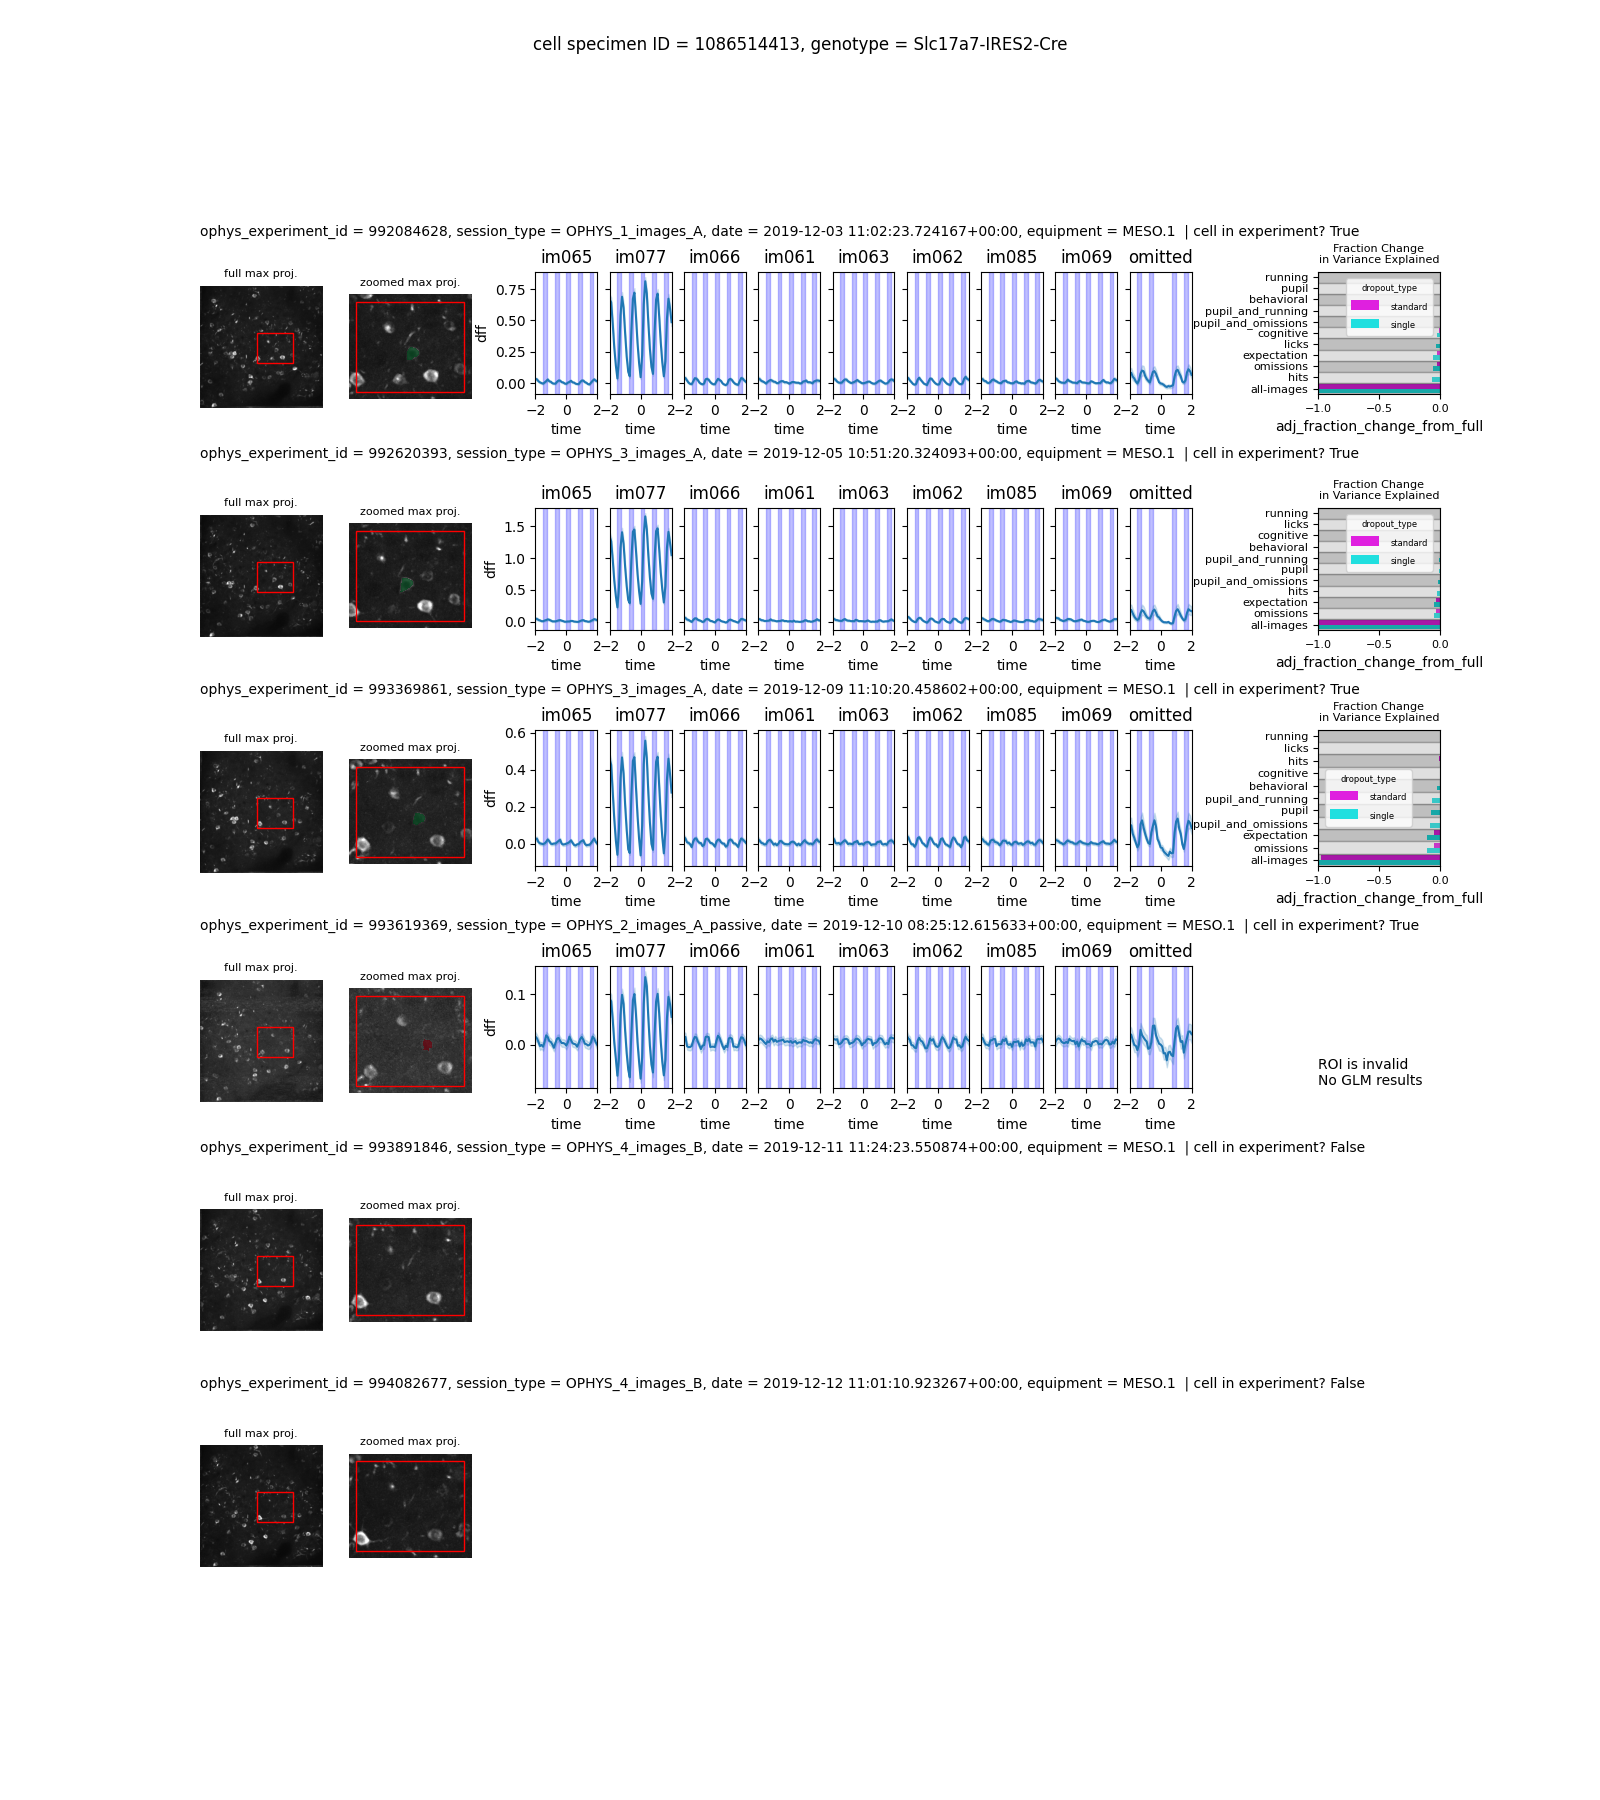

populating plot axes for each experiment: 100%|██████████| 6/6 [00:28<00:00,  4.81s/it]


In [52]:
fig, ax = scae.assemble_plot(experiments, cell_specimen_id, glm_version)